<a href="https://colab.research.google.com/github/Nivedhasriram/Machine-Learning-and-Algorithms/blob/main/IPAddress_Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444319 sha256=56a9031ea83a25760e53eb511dbb9d5f7fb88f89f4a2481d93986c6fbcd56c0a
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [3]:
from scapy.all import *
import pandas as pd
import csv

/usr/local/lib/python3.10/dist-packages/scapy/layers/ipsec.py:512: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  cipher=algorithms.TripleDES,
/usr/local/lib/python3.10/dist-packages/scapy/layers/ipsec.py:516: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  cipher=algorithms.TripleDES,


In [4]:
packets = rdpcap('IPdataset.pcap')

In [5]:
def extract_packet_info(packet):
    packet_data = {}

    # Check for IP Layer
    if IP in packet:
        packet_data['src_ip'] = packet[IP].src
        packet_data['dst_ip'] = packet[IP].dst
        packet_data['ip_version'] = packet[IP].version
        packet_data['ttl'] = packet[IP].ttl
        packet_data['ip_len'] = packet[IP].len
        packet_data['protocol'] = packet[IP].proto

    # Check for TCP Layer
    if TCP in packet:
        packet_data['src_port'] = packet[TCP].sport
        packet_data['dst_port'] = packet[TCP].dport
        packet_data['tcp_seq'] = packet[TCP].seq
        packet_data['tcp_ack'] = packet[TCP].ack
        packet_data['tcp_flags'] = packet[TCP].flags

    return packet_data


In [6]:
packet_list = []

for packet in packets:
    packet_info = extract_packet_info(packet)
    if packet_info:  # Only append non-empty packets
        packet_list.append(packet_info)


In [7]:
df = pd.DataFrame(packet_list)


In [8]:
df.to_csv('packets_data.csv', index=False)

In [9]:
with open('packets_data.csv', mode='w') as file:
    writer = csv.DictWriter(file, fieldnames=['src_ip', 'dst_ip', 'ip_version', 'ttl', 'ip_len', 'protocol', 'src_port', 'dst_port', 'tcp_seq', 'tcp_ack', 'tcp_flags'])
    writer.writeheader()

    # Process packets in chunks
    for packet in packets:
        packet_info = extract_packet_info(packet)
        if packet_info:
            writer.writerow(packet_info)

In [10]:
import datetime
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplot

In [11]:
df_file = "packets_data.csv"

df = pd.read_csv(df_file,  \
                 dtype=object)

df['timestamp'] = datetime.datetime.now()
df = df.set_index('timestamp')

print(sorted(df.columns))
print(df.shape)

['dst_ip', 'dst_port', 'ip_len', 'ip_version', 'protocol', 'src_ip', 'src_port', 'tcp_ack', 'tcp_flags', 'tcp_seq', 'ttl']
(1255, 11)


In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [13]:
df.head()

,src_ip,dst_ip,ip_version,ttl,ip_len,protocol,src_port,dst_port,tcp_seq,tcp_ack,tcp_flags
timestamp,,,,,,,,,,,
2024-09-16 08:45:32.623438,10.1.172.184,224.0.0.251,4,255,416,17,NaN,NaN,NaN,NaN,NaN
2024-09-16 08:45:32.623438,10.1.172.184,74.125.250.129,4,64,48,17,NaN,NaN,NaN,NaN,NaN
2024-09-16 08:45:32.623438,10.1.170.150,10.1.191.255,4,64,68,17,NaN,NaN,NaN,NaN,NaN
2024-09-16 08:45:32.623438,10.1.172.184,74.125.250.129,4,64,48,17,NaN,NaN,NaN,NaN,NaN
2024-09-16 08:45:32.623438,10.1.172.184,142.250.199.138,4,64,57,17,NaN,NaN,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2024-09-16 08:45:32.623438 to 2024-09-16 08:45:32.623438
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   src_ip      1255 non-null   object
 1   dst_ip      1255 non-null   object
 2   ip_version  1255 non-null   object
 3   ttl         1255 non-null   object
 4   ip_len      1255 non-null   object
 5   protocol    1255 non-null   object
 6   src_port    165 non-null    object
 7   dst_port    165 non-null    object
 8   tcp_seq     165 non-null    object
 9   tcp_ack     165 non-null    object
 10  tcp_flags   165 non-null    object
dtypes: object(11)
memory usage: 117.7+ KB


In [15]:
print(len(df['src_ip'].unique()))
print(len(df['dst_ip'].unique()))

76
33


In [16]:
src_ip_df = df['src_ip'].copy()
dst_ip_df = df['dst_ip'].copy()

src_ip_df = src_ip_df.reset_index()
del src_ip_df['timestamp']

dst_ip_df = dst_ip_df.reset_index()
del dst_ip_df['timestamp']

print(src_ip_df.shape)
src_ip_df.head(5)

(1255, 1)


,src_ip
0,10.1.172.184
1,10.1.172.184
2,10.1.170.150
3,10.1.172.184
4,10.1.172.184


In [17]:
print(dst_ip_df.shape)
dst_ip_df.head(5)

(1255, 1)


,dst_ip
0,224.0.0.251
1,74.125.250.129
2,10.1.191.255
3,74.125.250.129
4,142.250.199.138


In [18]:
src_ip_df = src_ip_df.dropna().copy()
dst_ip_df = dst_ip_df.dropna().copy()

src_ip_df=src_ip_df.drop_duplicates(['src_ip'])
dst_ip_df=dst_ip_df.drop_duplicates(['dst_ip'])
print(src_ip_df.shape)
print(dst_ip_df.shape)

(76, 1)
(33, 1)


In [19]:
src_ip_df.loc[:, 'oct1'] = src_ip_df['src_ip'].apply(lambda x: x.split(".")[0])
src_ip_df.loc[:, 'oct2'] = src_ip_df['src_ip'].apply(lambda x: x.split(".")[1])
src_ip_df.loc[:, 'oct3'] = src_ip_df['src_ip'].apply(lambda x: x.split(".")[2])
src_ip_df.loc[:, 'oct4'] = src_ip_df['src_ip'].apply(lambda x: x.split(".")[3])

dst_ip_df.loc[:, 'oct1'] = dst_ip_df['dst_ip'].apply(lambda x: x.split(".")[0])
dst_ip_df.loc[:, 'oct2'] = dst_ip_df['dst_ip'].apply(lambda x: x.split(".")[1])
dst_ip_df.loc[:, 'oct3'] = dst_ip_df['dst_ip'].apply(lambda x: x.split(".")[2])
dst_ip_df.loc[:, 'oct4'] = dst_ip_df['dst_ip'].apply(lambda x: x.split(".")[3])
src_ip_df = src_ip_df.reset_index()
dst_ip_df = dst_ip_df.reset_index()

In [20]:
print(src_ip_df.head(5))
print()
print(dst_ip_df.head(5))

   index           src_ip oct1 oct2 oct3 oct4
0      0     10.1.172.184   10    1  172  184
1      2     10.1.170.150   10    1  170  150
2      5  142.250.199.138  142  250  199  138
3      6     10.1.178.250   10    1  178  250
4     12      172.16.10.1  172   16   10    1

   index           dst_ip oct1 oct2 oct3 oct4
0      0      224.0.0.251  224    0    0  251
1      1   74.125.250.129   74  125  250  129
2      2     10.1.191.255   10    1  191  255
3      4  142.250.199.138  142  250  199  138
4      5     10.1.172.184   10    1  172  184


In [21]:
src_ip_df=src_ip_df.drop(['index'], axis = 1)
dst_ip_df=dst_ip_df.drop(['index'], axis = 1)
dst_ip_df

,dst_ip,oct1,oct2,oct3,oct4
0,224.0.0.251,224,0,0,251
1,74.125.250.129,74,125,250,129
2,10.1.191.255,10,1,191,255
3,142.250.199.138,142,250,199,138
4,10.1.172.184,10,1,172,184
5,172.16.10.1,172,16,10,1
6,13.107.42.14,13,107,42,14
7,142.250.67.142,142,250,67,142
8,216.239.34.180,216,239,34,180
9,142.251.12.188,142,251,12,188


In [22]:
src_ip_df = src_ip_df.reset_index()
print(src_ip_df.head(5))

dst_ip_df = dst_ip_df.reset_index()
print(src_ip_df.head(5))

   index           src_ip oct1 oct2 oct3 oct4
0      0     10.1.172.184   10    1  172  184
1      1     10.1.170.150   10    1  170  150
2      2  142.250.199.138  142  250  199  138
3      3     10.1.178.250   10    1  178  250
4      4      172.16.10.1  172   16   10    1
   index           src_ip oct1 oct2 oct3 oct4
0      0     10.1.172.184   10    1  172  184
1      1     10.1.170.150   10    1  170  150
2      2  142.250.199.138  142  250  199  138
3      3     10.1.178.250   10    1  178  250
4      4      172.16.10.1  172   16   10    1


In [23]:
x_matrix_src = np.array(src_ip_df[['oct1', 'oct2', 'oct3', 'oct4']])
print(x_matrix_src.shape)
print(x_matrix_src[0:5])
print()

x_matrix_dst = np.array(dst_ip_df[['oct1', 'oct2', 'oct3', 'oct4']])
print(x_matrix_dst.shape)
print(x_matrix_dst[0:5])

(76, 4)
[['10' '1' '172' '184']
 ['10' '1' '170' '150']
 ['142' '250' '199' '138']
 ['10' '1' '178' '250']
 ['172' '16' '10' '1']]

(33, 4)
[['224' '0' '0' '251']
 ['74' '125' '250' '129']
 ['10' '1' '191' '255']
 ['142' '250' '199' '138']
 ['10' '1' '172' '184']]


In [24]:
from sklearn.decomposition import PCA

# source
pcas = PCA(n_components=4)
pcas.fit(x_matrix_src)
print(pcas.explained_variance_ratio_)

#destination
pcad = PCA(n_components=4)
pcad.fit(x_matrix_dst)
print(pcad.explained_variance_ratio_)

[0.63210144 0.24367003 0.09835796 0.02587057]
[0.37229317 0.3071853  0.24892078 0.07160075]


In [25]:
pca_src = PCA(n_components=2)
pcas = pca_src.fit_transform(x_matrix_src)

pca_dest = PCA(n_components=2)
pcad = pca_dest.fit_transform(x_matrix_dst)

pcas1=[]
pcas2=[]

pcad1=[]
pcad2=[]


for i in pcas:
    pcas1.append(i[0])
    pcas2.append(i[1])

for i in pcad:
    pcad1.append(i[0])
    pcad2.append(i[1])

print(len(pcas1))
print(len(pcas2))

print(len(pcad1))
print(len(pcad2))

76
76
33
33


In [26]:
print(pcas.shape)
print(pcad.shape)

(76, 2)
(33, 2)


In [27]:
src_ip_df['pca1'] = pcas1
src_ip_df['pca2'] = pcas2
print(src_ip_df[:2])
print()
dst_ip_df['pca1'] = pcad1
dst_ip_df['pca2'] = pcad2

print(dst_ip_df[:2])

   index        src_ip oct1 oct2 oct3 oct4    pca1    pca2
0      0  10.1.172.184   10    1  172  184 -88.034 -49.916
1      1  10.1.170.150   10    1  170  150 -85.314 -16.064

   index          dst_ip oct1 oct2 oct3 oct4    pca1    pca2
0      0     224.0.0.251  224    0    0  251   7.244 287.867
1      1  74.125.250.129   74  125  250  129 -54.562 -28.795


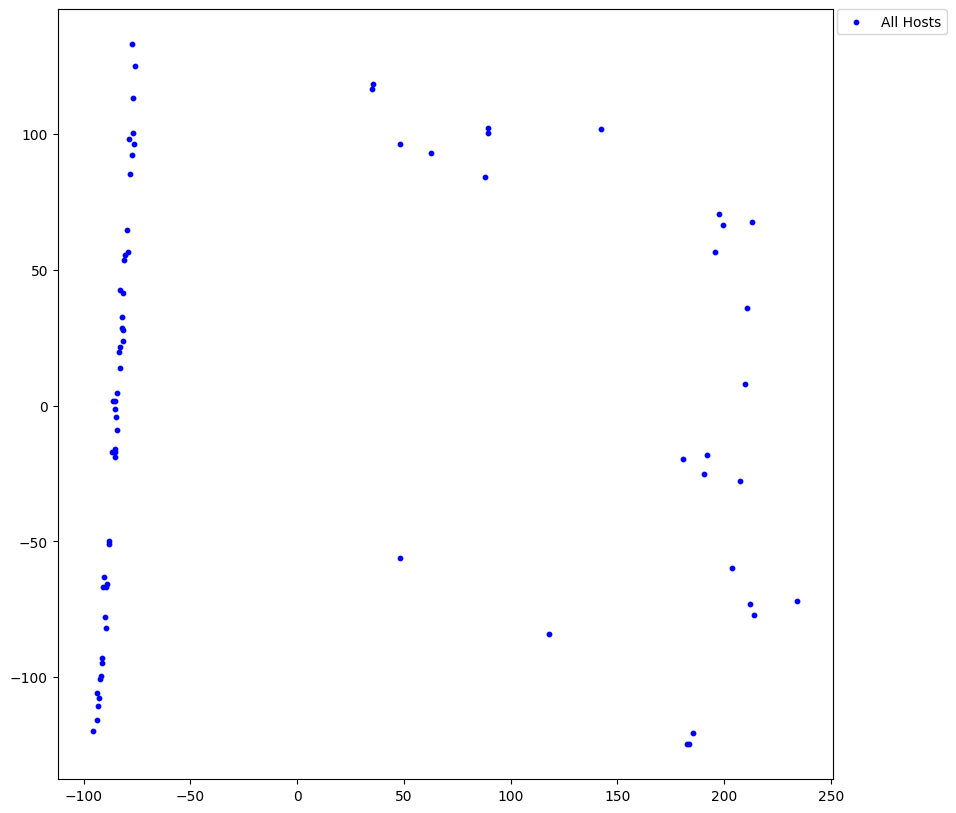

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(src_ip_df['pca1'], src_ip_df['pca2'], s=10, color='blue',label="All Hosts")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

In [29]:
from sklearn.mixture import BayesianGaussianMixture

bgms = BayesianGaussianMixture(n_components=7, n_init=10, random_state=100)

bgms.fit(x_matrix_src)
np.round(bgms.weights_, 2)

array([0.65, 0.09, 0.07, 0.16, 0.01, 0.03, 0.  ])

In [30]:
bgms = BayesianGaussianMixture(n_components=3, n_init=10, random_state=100)
bgms.fit(x_matrix_src)
print(np.round(bgms.weights_, 2))

print(bgms.means_)
pca_means = pca_src.transform(bgms.means_)
print()
print(pca_means)

[0.65 0.33 0.03]
[[ 10.80026878   2.47395772 174.23972442 138.43379727]
 [117.28628959 215.4623008  152.12345022 115.68811358]
 [120.53610028  57.4089731   95.55755658  51.73232188]]

[[-83.37746355  -4.72011117]
 [156.47947487   1.01823719]
 [ 32.63834538  70.29204166]]


In [31]:
means_df_s = pd.DataFrame(pca_means, columns=['pca1','pca2'])
means_df_s

,pca1,pca2
0,-83.377,-4.720
1,156.479,1.018
2,32.638,70.292


In [32]:
print(bgms.converged_)
print(bgms.n_iter_)

bgms.predict(x_matrix_src)

True
8


array([0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [33]:
src_ip_df['kcluster']=bgms.predict(x_matrix_src).tolist()
src_ip_df.tail(10)

,index,src_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
66,66,35.186.224.22,35,186,224,22,89.458,102.167,1
67,67,142.250.205.238,142,250,205,238,182.353,-124.666,1
68,68,10.1.173.229,10,1,173,229,-91.416,-94.705,0
69,69,10.1.175.227,10,1,175,227,-91.535,-92.734,0
70,70,10.1.170.185,10,1,170,185,-87.843,-50.892,0
71,71,142.250.77.174,142,250,77,174,203.802,-59.745,1
72,72,10.1.177.135,10,1,177,135,-85.150,-1.206,0
73,73,10.1.172.212,10,1,172,212,-90.057,-77.779,0
74,74,10.1.163.37,10,1,163,37,-76.229,96.448,0
75,75,10.1.185.91,10,1,185,91,-83.023,42.501,0


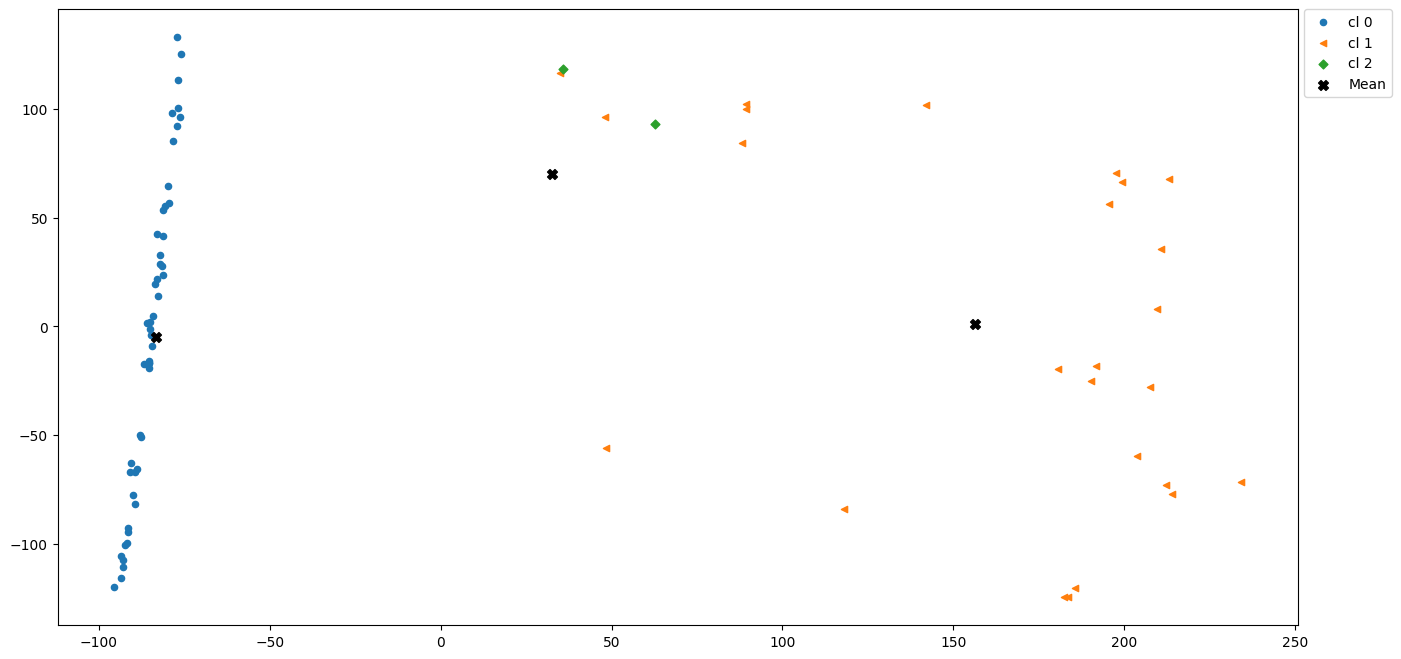

In [34]:
dfs0=src_ip_df[src_ip_df.kcluster==0]
dfs1=src_ip_df[src_ip_df.kcluster==1]
dfs2=src_ip_df[src_ip_df.kcluster==2]
plt.rcParams["figure.figsize"] = (16,8)
pyplot.scatter(dfs0['pca1'],dfs0['pca2'],s=20,label="cl 0")
pyplot.scatter(dfs1['pca1'],dfs1['pca2'],s=20,marker="<",label="cl 1")
pyplot.scatter(dfs2['pca1'],dfs2['pca2'],s=20,marker="D",label="cl 2")
pyplot.scatter(means_df_s['pca1'],means_df_s['pca2'],s=50,marker="X",label="Mean", color='black')

pyplot.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
pyplot.show()

In [35]:
np.round(bgms.weights_, 3)

array([0.648, 0.326, 0.026])

In [36]:
dfs0

,index,src_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
0,0,10.1.172.184,10,1,172,184,-88.034,-49.916,0
1,1,10.1.170.150,10,1,170,150,-85.314,-16.064,0
3,3,10.1.178.250,10,1,178,250,-93.591,-115.650,0
7,7,10.1.170.200,10,1,170,200,-88.927,-65.818,0
8,8,10.1.167.143,10,1,167,143,-84.414,-9.070,0
10,10,10.1.178.132,10,1,178,132,-85.065,1.770,0
11,11,10.1.170.151,10,1,170,151,-85.386,-17.059,0
13,13,10.1.178.20,10,1,178,20,-76.973,113.219,0
15,15,10.1.191.254,10,1,191,254,-95.589,-119.756,0
16,16,10.1.177.245,10,1,177,245,-93.098,-110.665,0


In [37]:
print(dfs0.oct1.value_counts())
print(dfs0.oct2.value_counts())
print(dfs0.oct3.value_counts())

oct1
10    49
Name: count, dtype: int64
oct2
1    49
Name: count, dtype: int64
oct3
177    6
173    6
172    4
170    4
178    3
165    3
184    3
171    3
174    2
169    2
175    2
185    2
168    1
176    1
182    1
181    1
162    1
190    1
191    1
167    1
163    1
Name: count, dtype: int64


In [38]:
dfs1

,index,src_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
2,2,142.250.199.138,142,250,199,138,190.367,-25.099,1
5,5,13.107.42.14,13,107,42,14,34.916,116.612,1
6,6,142.250.67.142,142,250,67,142,207.429,-27.806,1
9,9,216.239.34.180,216,239,34,180,234.282,-71.770,1
12,12,142.251.12.188,142,251,12,188,212.204,-73.083,1
14,14,35.186.224.40,35,186,224,40,88.158,84.256,1
19,19,142.250.195.238,142,250,195,238,183.667,-124.569,1
23,23,163.70.144.174,163,70,144,174,48.369,-56.199,1
24,24,35.186.224.24,35,186,224,24,89.314,100.177,1
25,25,142.250.192.131,142,250,192,131,191.793,-18.066,1


In [39]:
print(dfs1.oct1.value_counts())
print(dfs1.oct2.value_counts())
print(dfs1.oct3.value_counts())

oct1
142    13
35      3
172     2
13      1
216     1
163     1
104     1
17      1
34      1
157     1
Name: count, dtype: int64
oct2
250    12
186     3
107     1
239     1
251     1
70      1
199     1
252     1
144     1
240     1
253     1
217     1
Name: count, dtype: int64
oct3
77     3
224    3
192    2
196    2
199    1
183    1
182    1
167    1
70     1
118    1
254    1
241    1
42     1
144    1
195    1
12     1
34     1
67     1
205    1
Name: count, dtype: int64


In [40]:
dfs2

,index,src_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
4,4,172.16.10.1,172,16,10,1,35.765,118.252,2
43,43,140.82.113.26,140,82,113,26,62.747,93.091,2


In [41]:
bgms.score_samples(x_matrix_src)

array([-15.33112025, -15.22062425, -21.72269505, -16.37225545,
       -25.2726832 , -26.71992781, -22.11140629, -15.6415787 ,
       -15.47133818, -23.60945114, -15.15382466, -15.22392107,
       -24.32439525, -16.69021952, -22.46945873, -18.14261978,
       -16.23514484, -19.24816809, -16.47335804, -23.23978903,
       -15.07337498, -16.22515669, -15.37272819, -27.93007585,
       -22.56569065, -21.62817092, -15.06620275, -15.9880098 ,
       -23.19911052, -15.44252269, -15.89810691, -16.23840473,
       -24.67339305, -15.46491841, -16.17075281, -15.13312844,
       -16.63284911, -15.48490708, -22.79324886, -15.20399029,
       -16.73804427, -15.30735576, -16.02764455, -24.67171854,
       -23.17236283, -23.25049563, -15.13881483, -15.77032914,
       -15.23597525, -21.79829757, -15.90226109, -16.17069949,
       -15.37439587, -15.30133892, -22.04357326, -16.94134727,
       -16.03168732, -16.00637803, -15.1629639 , -22.25839106,
       -22.7008744 , -15.57039586, -16.04342609, -23.02

In [42]:
densities_s = bgms.score_samples(x_matrix_src)
dens_threshold_s = np.percentile(densities_s, 4)

print("Maximum Density : " + str(max(densities_s)))
print("Minimum Density : " + str(min(densities_s)))
print("Threshold Density : " + str(dens_threshold_s))

anomalies_s = x_matrix_src[densities_s < dens_threshold_s]

Maximum Density : -15.066202747789054
Minimum Density : -27.930075850313123
Threshold Density : -24.67339305181762


In [43]:
print(anomalies_s)
print(len(anomalies_s))

[['172' '16' '10' '1']
 ['13' '107' '42' '14']
 ['163' '70' '144' '174']]
3


In [44]:
anomalies_df_s = src_ip_df[densities_s < dens_threshold_s]
anomalies_df_s

,index,src_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
4,4,172.16.10.1,172,16,10,1,35.765,118.252,2
5,5,13.107.42.14,13,107,42,14,34.916,116.612,1
23,23,163.70.144.174,163,70,144,174,48.369,-56.199,1


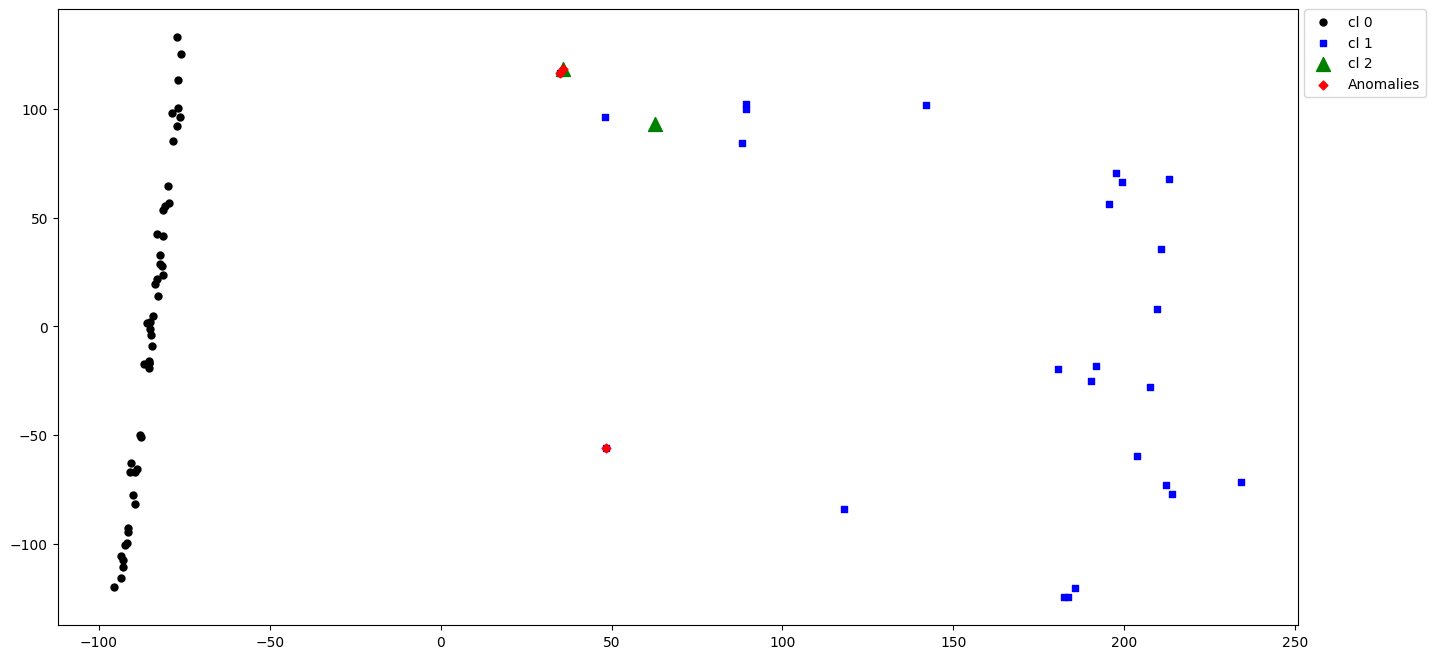

In [45]:
plt.rcParams["figure.figsize"] = (16,8)
pyplot.scatter(dfs0['pca1'],dfs0['pca2'],s=25,label="cl 0", color='black')
pyplot.scatter(dfs1['pca1'],dfs1['pca2'],s=25,marker=",",label="cl 1", color='blue')
pyplot.scatter(dfs2['pca1'],dfs2['pca2'],s=100,marker="^",label="cl 2", color='green')
pyplot.scatter(anomalies_df_s['pca1'],anomalies_df_s['pca2'],s=20,marker="D",label="Anomalies", color='red')

pyplot.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
pyplot.show()

In [46]:
list(anomalies_df_s.src_ip)

['172.16.10.1', '13.107.42.14', '163.70.144.174']

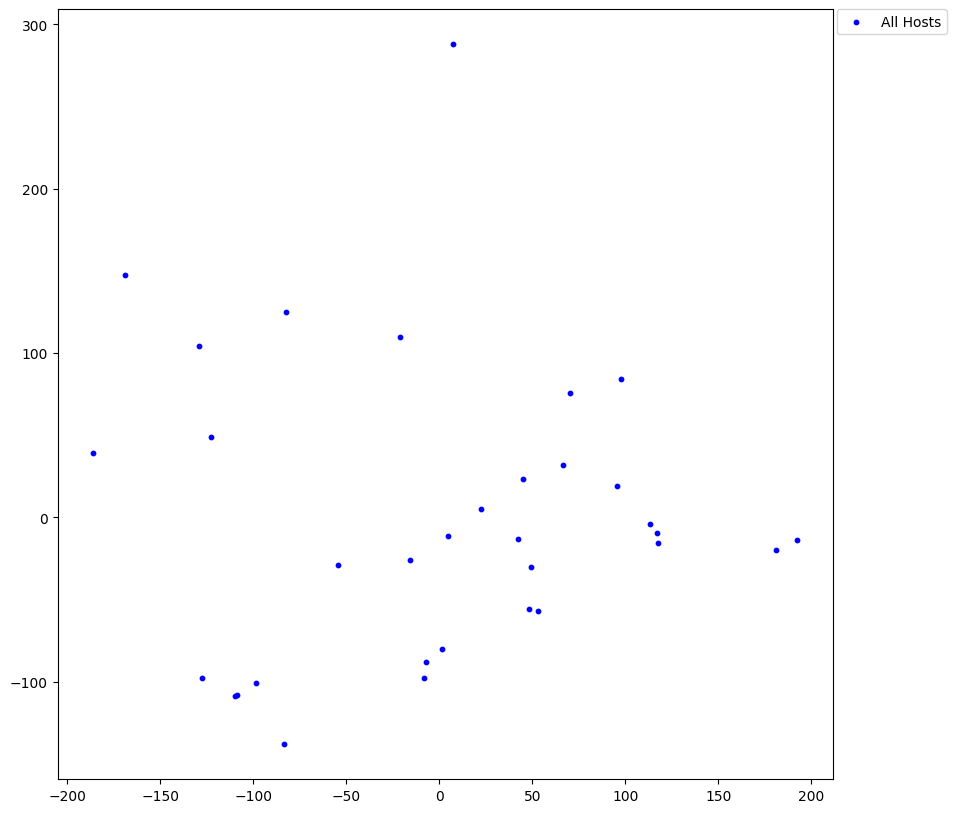

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(dst_ip_df['pca1'], dst_ip_df['pca2'], s=10, color='blue',label="All Hosts")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

In [48]:
from sklearn.mixture import BayesianGaussianMixture

bgms = BayesianGaussianMixture(n_components=7, n_init=10, random_state=100)

bgms.fit(x_matrix_dst)
np.round(bgms.weights_, 2)

array([0.21, 0.2 , 0.08, 0.38, 0.06, 0.07, 0.  ])

In [49]:
bgmd = BayesianGaussianMixture(n_components=4, n_init=10, random_state=100)
bgmd.fit(x_matrix_dst)
np.round(bgmd.weights_, 2)

array([0.3 , 0.5 , 0.07, 0.13])

In [50]:
pca_means_dst = pca_dest.transform(bgmd.means_)
means_df_d = pd.DataFrame(pca_means_dst, columns=['pca1','pca2'])
means_df_d

,pca1,pca2
0,-56.115,-82.296
1,71.938,-1.087
2,-69.915,75.738
3,-81.727,104.666


In [51]:
bgmd.predict(x_matrix_dst)

array([3, 0, 2, 1, 2, 3, 3, 1, 1, 1, 0, 1, 1, 3, 0, 1, 1, 0, 1, 3, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [52]:
dst_ip_df['kcluster']=bgmd.predict(x_matrix_dst).tolist()
dst_ip_df.head(10)

,index,dst_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
0,0,224.0.0.251,224,0,0,251,7.244,287.867,3
1,1,74.125.250.129,74,125,250,129,-54.562,-28.795,0
2,2,10.1.191.255,10,1,191,255,-82.286,124.943,2
3,3,142.250.199.138,142,250,199,138,53.116,-56.641,1
4,4,10.1.172.184,10,1,172,184,-129.226,104.359,2
5,5,172.16.10.1,172,16,10,1,-168.895,147.462,3
6,6,13.107.42.14,13,107,42,14,-186.185,39.381,3
7,7,142.250.67.142,142,250,67,142,44.929,23.221,1
8,8,216.239.34.180,216,239,34,180,97.647,84.338,1
9,9,142.251.12.188,142,251,12,188,70.436,75.739,1


In [53]:
dfd0=dst_ip_df[dst_ip_df.kcluster==0]
dfd1=dst_ip_df[dst_ip_df.kcluster==1]
dfd2=dst_ip_df[dst_ip_df.kcluster==2]
dfd3=dst_ip_df[dst_ip_df.kcluster==3]

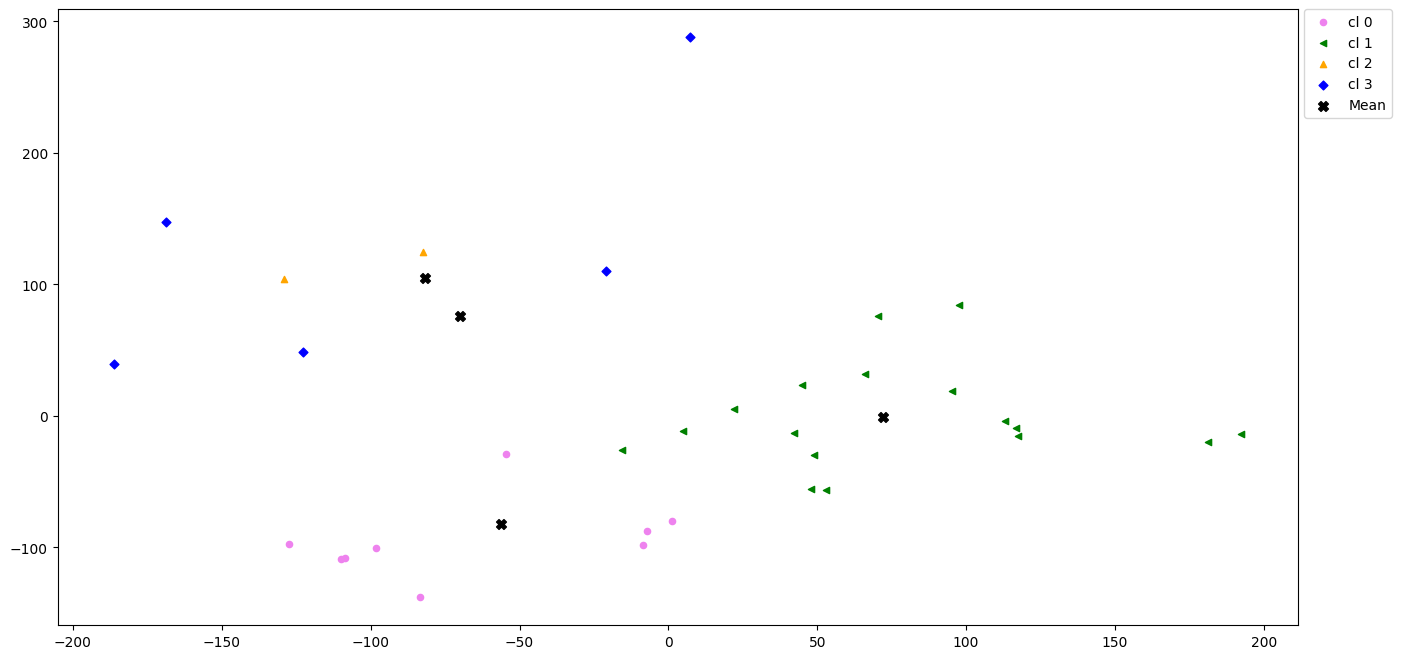

In [54]:
plt.rcParams["figure.figsize"] = (16,8)
pyplot.scatter(dfd0['pca1'],dfd0['pca2'],s=20,label="cl 0", color='violet')
pyplot.scatter(dfd1['pca1'],dfd1['pca2'],s=20,marker="<",label="cl 1", color='green')
pyplot.scatter(dfd2['pca1'],dfd2['pca2'],s=20,marker="^",label="cl 2", color='orange')
pyplot.scatter(dfd3['pca1'],dfd3['pca2'],s=20,marker="D",label="cl 3", color='blue')
pyplot.scatter(means_df_d['pca1'],means_df_d['pca2'],s=50,marker="X",label="Mean", color='black')

pyplot.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
pyplot.show()

In [55]:
# Weights of the clusters
np.round(bgmd.weights_, 2)

array([0.3 , 0.5 , 0.07, 0.13])

In [56]:
# Cluster 0
print(dfd0.shape)
dfd0.head(20)

(9, 9)


,index,dst_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
1,1,74.125.250.129,74,125,250,129,-54.562,-28.795,0
10,10,35.186.224.40,35,186,224,40,-98.315,-100.828,0
14,14,35.186.224.24,35,186,224,24,-108.544,-107.999,0
17,17,17.252.196.22,17,252,196,22,-83.351,-137.972,0
20,20,34.144.254.29,34,144,254,29,-127.500,-97.435,0
21,21,157.240.192.55,157,240,192,55,1.330,-79.853,0
25,25,142.250.182.46,142,250,182,46,-7.088,-87.819,0
26,26,142.250.196.42,142,250,196,42,-8.506,-97.892,0
29,29,35.186.224.22,35,186,224,22,-109.823,-108.896,0


In [57]:
dfd0['oct1'].value_counts()

,count
oct1,
35,3
142,2
74,1
17,1
34,1
157,1


In [58]:
# Cluster 1
print(dfd1.shape)
dfd1.head(20)

(17, 9)


,index,dst_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
3,3,142.250.199.138,142,250,199,138,53.116,-56.641,1
7,7,142.250.67.142,142,250,67,142,44.929,23.221,1
8,8,216.239.34.180,216,239,34,180,97.647,84.338,1
9,9,142.251.12.188,142,251,12,188,70.436,75.739,1
11,11,255.255.255.255,255,255,255,255,192.482,-13.458,1
12,12,142.250.195.238,142,250,195,238,116.725,-9.457,1
15,15,142.250.192.131,142,250,192,131,48.071,-55.638,1
16,16,104.199.241.202,104,199,241,202,48.988,-29.934,1
18,18,142.250.77.46,142,250,77,46,-15.634,-25.719,1
22,22,172.253.118.188,172,253,118,188,95.380,18.963,1


In [59]:
print(dfd1['oct1'].value_counts())
print(dfd1['oct2'].value_counts())
print(dfd1['oct3'].value_counts())

oct1
142    11
172     2
216     1
255     1
104     1
239     1
Name: count, dtype: int64
oct2
250    10
255     2
239     1
251     1
199     1
253     1
217     1
Name: count, dtype: int64
oct3
77     3
255    2
199    1
67     1
34     1
12     1
195    1
192    1
241    1
118    1
70     1
167    1
183    1
205    1
Name: count, dtype: int64


In [60]:
# Cluster 2
print(dfd2.shape)
dfd2.head(20)

(2, 9)


,index,dst_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
2,2,10.1.191.255,10,1,191,255,-82.286,124.943,2
4,4,10.1.172.184,10,1,172,184,-129.226,104.359,2


In [61]:
print(dfd2['oct1'].value_counts())
print(dfd2['oct2'].value_counts())
print(dfd2['oct3'].value_counts())

oct1
10    2
Name: count, dtype: int64
oct2
1    2
Name: count, dtype: int64
oct3
191    1
172    1
Name: count, dtype: int64


In [62]:
# Cluster 3
print(dfd3.shape)
dfd3.head(20)

(5, 9)


,index,dst_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
0,0,224.0.0.251,224,0,0,251,7.244,287.867,3
5,5,172.16.10.1,172,16,10,1,-168.895,147.462,3
6,6,13.107.42.14,13,107,42,14,-186.185,39.381,3
13,13,163.70.144.174,163,70,144,174,-20.962,109.775,3
19,19,140.82.113.26,140,82,113,26,-122.856,48.768,3


In [63]:
print(dfd3['oct1'].value_counts())
print(dfd3['oct2'].value_counts())
print(dfd3['oct3'].value_counts())

oct1
224    1
172    1
13     1
163    1
140    1
Name: count, dtype: int64
oct2
0      1
16     1
107    1
70     1
82     1
Name: count, dtype: int64
oct3
0      1
10     1
42     1
144    1
113    1
Name: count, dtype: int64


In [64]:
print(dfd3[dfd3['oct1']=='172'])

   index       dst_ip oct1 oct2 oct3 oct4     pca1    pca2  kcluster
5      5  172.16.10.1  172   16   10    1 -168.895 147.462         3


In [65]:
bgmd.score_samples(x_matrix_dst)

array([-25.73453325, -22.86022615, -23.97869002, -20.66309306,
       -23.61660075, -25.10079792, -25.98108808, -20.38080829,
       -22.94120692, -22.58170589, -20.47959783, -23.54745349,
       -21.07270747, -24.32111464, -20.56045547, -20.613067  ,
       -22.79833102, -23.19286846, -22.06583814, -23.95852489,
       -21.62152421, -21.49008335, -20.01635906, -20.51080917,
       -20.80794124, -21.12943012, -21.34939887, -21.01374639,
       -20.94435324, -20.586329  , -21.11821892, -20.53595099,
       -22.66254674])

In [66]:
densities_d = bgmd.score_samples(x_matrix_dst)
dens_threshold_d = np.percentile(densities_d, 4)
print("Maximum Density: " + str(max(densities_d)))
print("Minimum Density: " + str(min(densities_d)))
print("Threshold Density: " + str(dens_threshold_d))

anomalies_d = x_matrix_dst[densities_d < dens_threshold_d]

Maximum Density: -20.016359064756404
Minimum Density: -25.981088079012473
Threshold Density: -25.557087358048708


In [67]:
print(len(anomalies_d))

2


In [68]:
anomalies_df_d = dst_ip_df[densities_d < dens_threshold_d]
anomalies_df_d

,index,dst_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
0,0,224.0.0.251,224,0,0,251,7.244,287.867,3
6,6,13.107.42.14,13,107,42,14,-186.185,39.381,3


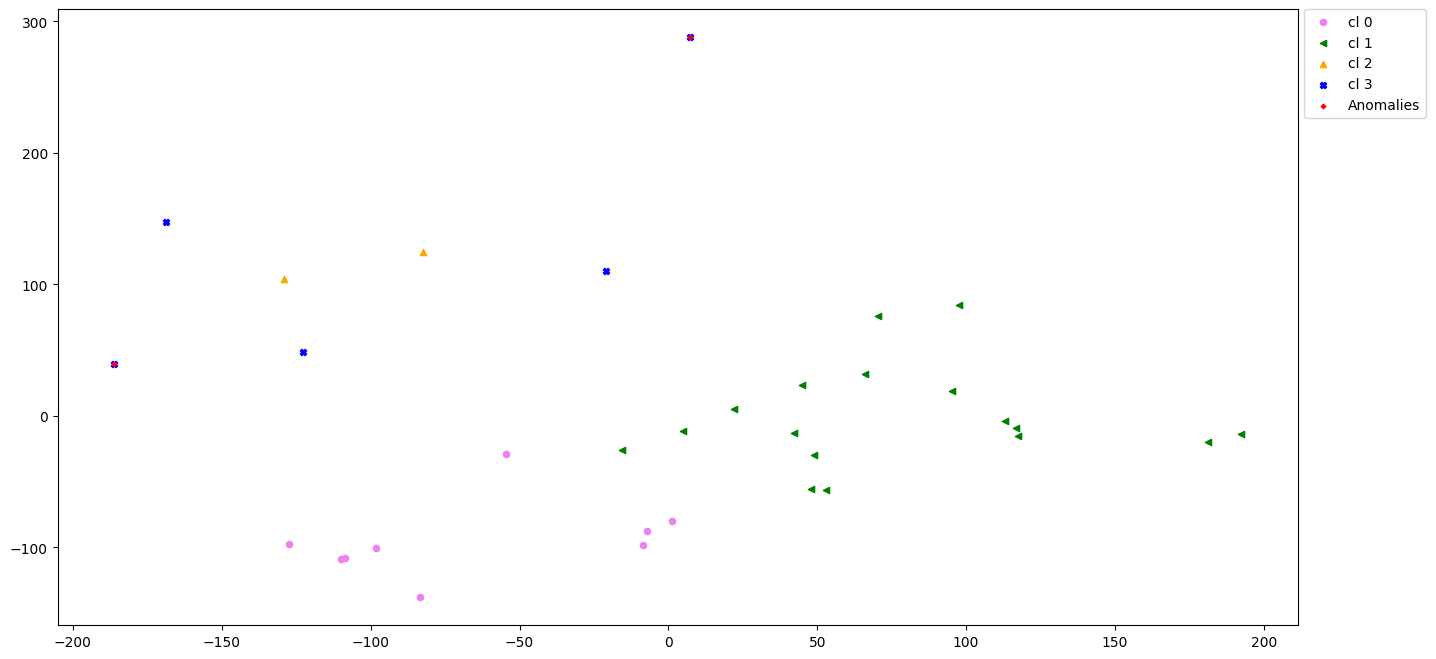

In [69]:
plt.rcParams["figure.figsize"] = (16,8)
pyplot.scatter(dfd0['pca1'],dfd0['pca2'],s=20,label="cl 0", color='violet')
pyplot.scatter(dfd1['pca1'],dfd1['pca2'],s=20,marker="<",label="cl 1", color='green')
pyplot.scatter(dfd2['pca1'],dfd2['pca2'],s=20,marker="^",label="cl 2", color='orange')
pyplot.scatter(dfd3['pca1'],dfd3['pca2'],s=20,marker="X",label="cl 3", color='blue')
pyplot.scatter(anomalies_df_d['pca1'],anomalies_df_d['pca2'],s=5,marker="D",label="Anomalies", color='red')

pyplot.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
pyplot.show()

In [70]:
print(len(anomalies_df_d))
anomalies_df_d[anomalies_df_d['kcluster']==3]

2


,index,dst_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
0,0,224.0.0.251,224,0,0,251,7.244,287.867,3
6,6,13.107.42.14,13,107,42,14,-186.185,39.381,3


In [71]:
print(len(anomalies_df_s))
anomalies_df_s[anomalies_df_s['kcluster']==1]

3


,index,src_ip,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
5,5,13.107.42.14,13,107,42,14,34.916,116.612,1
23,23,163.70.144.174,163,70,144,174,48.369,-56.199,1
